In [241]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# This is my web scraping project

In [242]:
%matplotlib inline

In [243]:
df = pd.read_csv("scraping_project.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

/Users/shubhvarma/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df['Type'].unique()

array(['Land', 'Office', 'Retail', 'Special Purpose', 'Hotel & Motel',
       'Industrial', 'Multifamily', 'Agricultural', 'Residential Income',
       'Senior Housing', 'Sport & Entertainment', 'Health Care'], dtype=object)

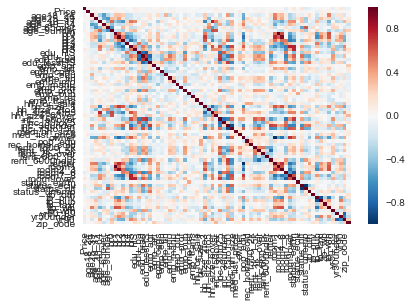

In [25]:
import seaborn as sns
corr = df[df.Type == 'Land'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

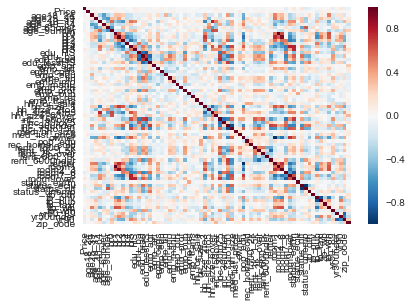

In [26]:
import seaborn as sns
corr = df[df.Type == 'Office'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [32]:
print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.corr().shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 70)
print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))



Correlation Matrix
                   Price  age18_24  age25_39  age_10_17  age_40_64  \
Price           1.000000 -0.003935  0.057589  -0.019375   0.001523   
age18_24       -0.003935  1.000000  0.105933  -0.289570  -0.594578   
age25_39        0.057589  0.105933  1.000000  -0.308710  -0.463585   
age_10_17      -0.019375 -0.289570 -0.308710   1.000000   0.091894   
age_40_64       0.001523 -0.594578 -0.463585   0.091894   1.000000   
age_65over     -0.032211 -0.317718 -0.532601  -0.333115   0.284197   
age_9under     -0.014752 -0.166919  0.108126   0.591108  -0.318964   
br0             0.064475  0.206400  0.387192  -0.415710  -0.156659   
br1             0.062500  0.246946  0.541320  -0.548700  -0.251550   
br2            -0.029566  0.162269  0.204864  -0.490502  -0.243531   
br3            -0.074580 -0.198405 -0.372356   0.370849   0.170182   
br4             0.009975 -0.193593 -0.342780   0.532566   0.305898   
br5             0.043438 -0.103224 -0.192393   0.412028   0.079183   
e

KeyError: ('num_stories', 'emp_edu')

300

Type
Land                     2813
Retail                   2113
Industrial               1163
Office                   1023
Multifamily               574
Hotel & Motel             257
Special Purpose           183
Agricultural              136
Residential Income         44
Senior Housing             27
Sport & Entertainment      23
Health Care                 8
Name: Price, dtype: int64


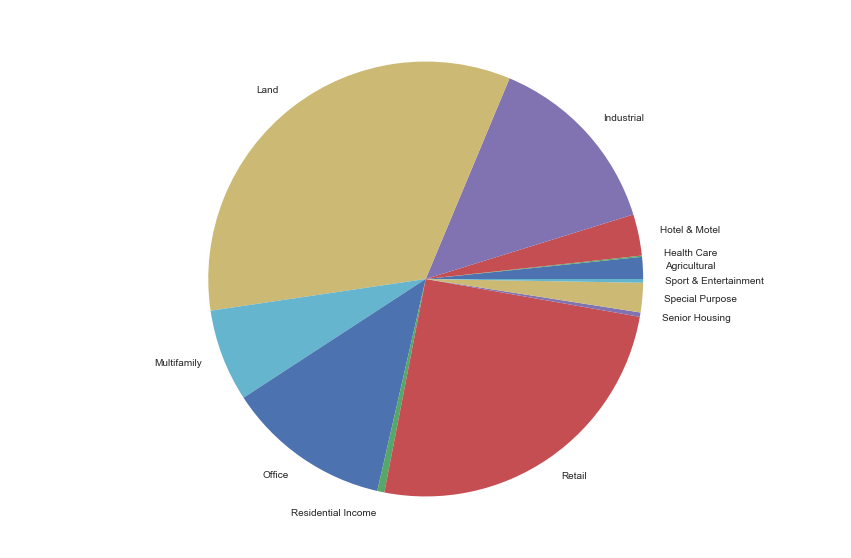

In [186]:
from matplotlib.pyplot import pie, axis, show
print(df.groupby('Type')['Price'].agg('count').sort_values(ascending=False))

sums = df.Price.groupby(df.Type).count()
axis('equal');
pie(sums, labels=sums.index);
show()

Type
Multifamily             6,811,728
Agricultural            6,216,041
Office                  5,887,366
Retail                  5,882,607
Land                    5,860,177
Hotel & Motel           5,763,648
Residential Income      5,645,084
Industrial              5,585,647
Special Purpose         5,413,186
Sport & Entertainment   5,198,589
Senior Housing          4,923,520
Health Care             4,273,750
Name: Price, dtype: float64


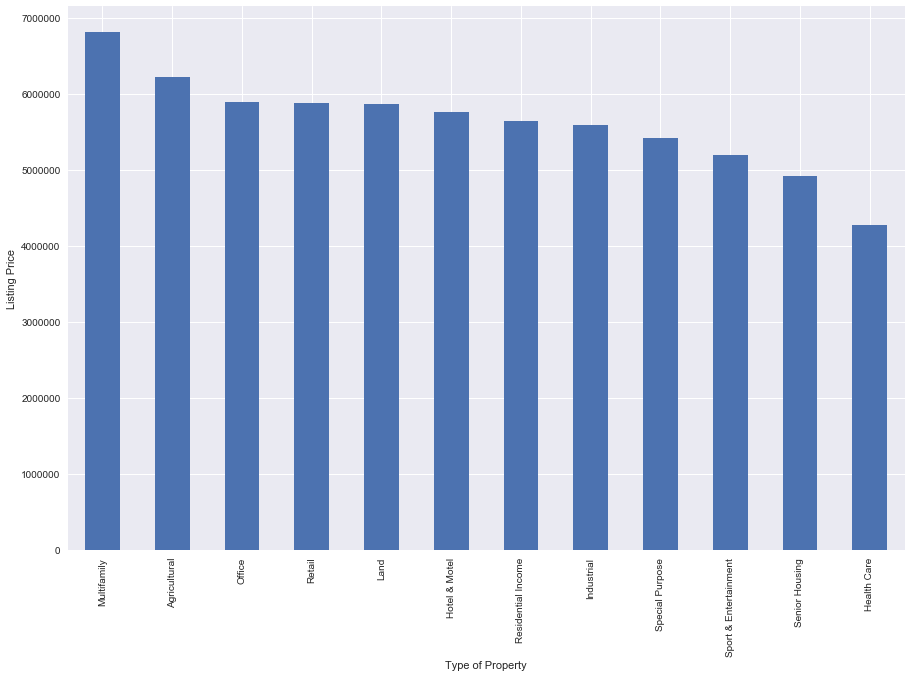

In [194]:
df.groupby('Type')['Price'].mean().sort_values(ascending=False).plot.bar()
plt.xlabel('Type of Property')
plt.ylabel('Listing Price')
pd.options.display.float_format = '{:,.0f}'.format
print(df.groupby('Type')['Price'].mean().sort_values(ascending=False))

In [99]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


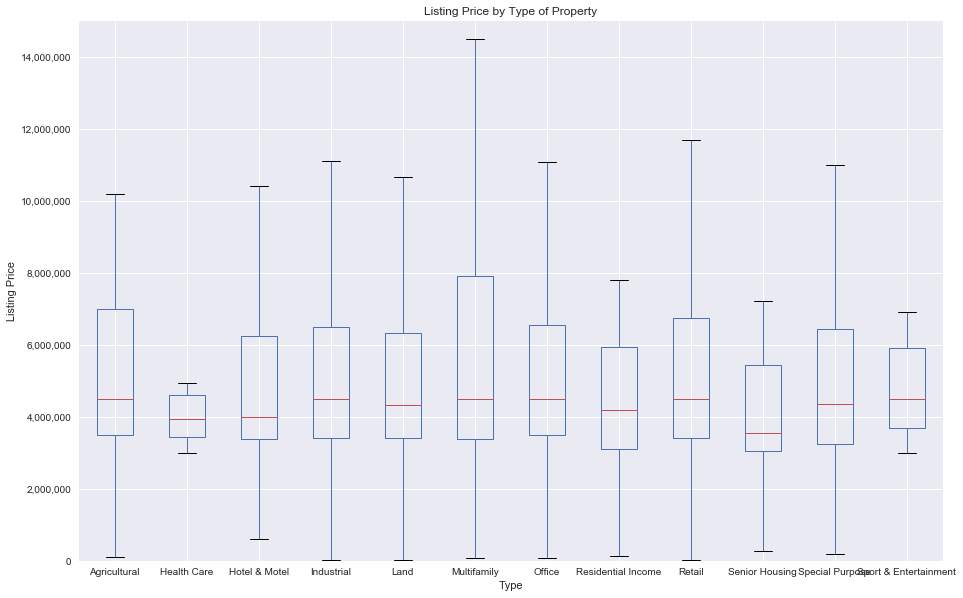

In [216]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FixedFormatter
pd.options.display.float_format = '{:,.0f}'.format
df_box = df[['Type','Price']]
#df_box = df_box.loc[(df_box.Price - df_box.Price.mean()).abs() / df_box.Price.std() < 3]
df_box.boxplot(by = 'Type',column='Price')
plt.ylabel('Listing Price')
plt.ylim(0,0.15e8)
plt.title("Listing Price by Type of Property")
plt.suptitle("")
ax = plt.gca()
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

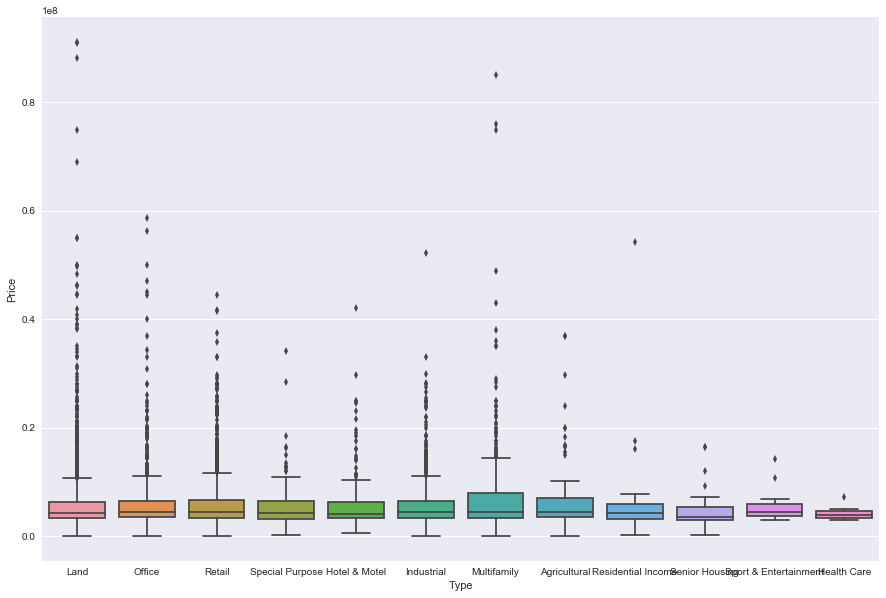

In [133]:
sns.boxplot(x='Type', y='Price', data=df)

In [238]:
df2 = df[df.Type == 'Land'].corr()
j = 68
#print(df.corr().abs().unstack()[:j].sort_values(ascending = False).head(n = 10)[1:])
for x in range(68):
    print(df2.corr().abs().unstack()[x*j:(x+1)*j].sort_values(ascending = False).head(n = 10)[1:])

Price  med_list_price   0
       emp_info         0
       br3              0
       edu_HS           0
       rent_2k_over     0
       emp_prof         0
       edu_grad         0
       tp_priv          0
       emp_fin          0
dtype: float64
age18_24  renter      1
          owner       1
          tp_wb       1
          age_40_64   1
          room7_8     1
          room2_3     1
          br1         1
          room1       1
          br0         1
dtype: float64
age25_39  hh_size_2to3   1
          age_40_64      1
          owner          1
          renter         1
          br1            1
          room2_3        1
          tp_pub         1
          br0            1
          room1          1
dtype: float64
age_10_17  hh_size_4to5   1
           hh_size_1      1
           br2            1
           room2_3        1
           br4            1
           room7_8        1
           age_9under     1
           br1            1
           tp_wb          1
dtype: flo

room4_6  inc_150over     1
         edu_ba          1
         room9over       1
         edu_lessHS      1
         inc_75to150     1
         inc_30to75      1
         inc_30under     1
         br5             1
         rent_600under   1
dtype: float64
room7_8  br4           1
         br2           1
         renter        1
         owner         1
         inc_30under   1
         inc_75to150   1
         room9over     1
         hh_size_1     1
         room2_3       1
dtype: float64
room9over  br4           1
           inc_30under   1
           inc_75to150   1
           br5           1
           room4_6       1
           room7_8       1
           inc_150over   1
           br2           1
           edu_lessHS    1
dtype: float64
status_earm  emp_pub         1
             age_9under      0
             age_65over      0
             age_40_64       0
             age25_39        0
             emp_manu        0
             tp_wfh          0
             hh_size_6over 

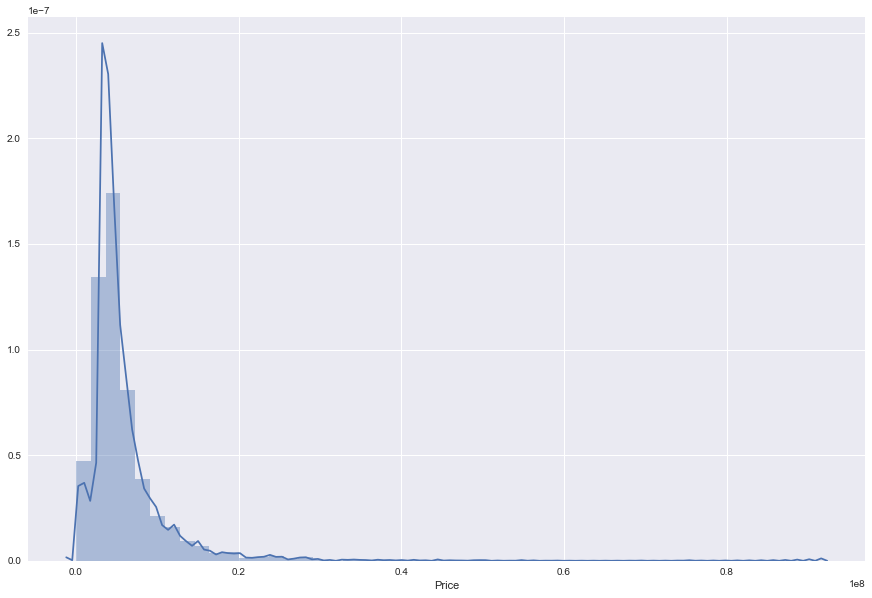

In [218]:
sns.distplot(df['Price'])


Populating the interactive namespace from numpy and matplotlib


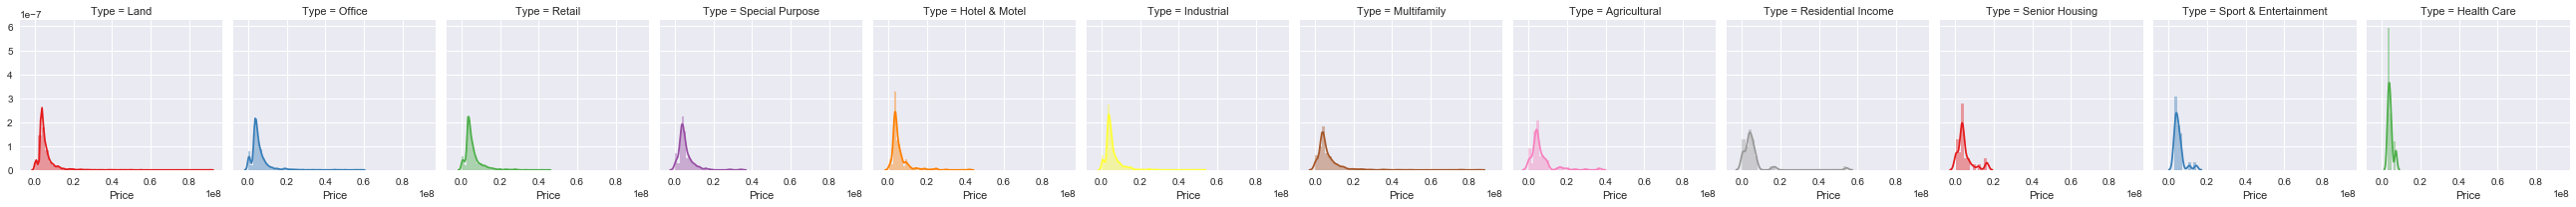

In [181]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
PriceGrid = sns.FacetGrid(df, col='Type', hue="Type", palette="Set1")
PriceGrid.map(sns.distplot, "Price")

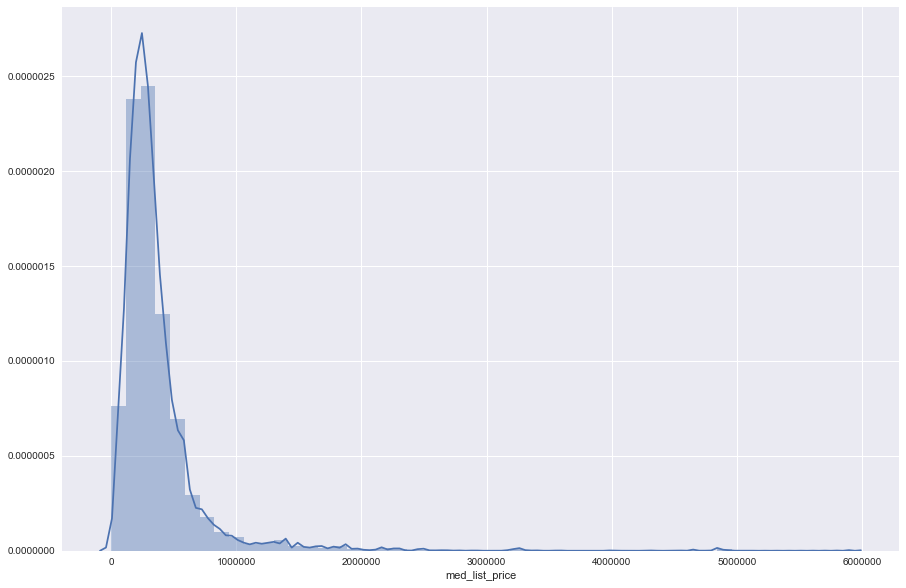

In [130]:
sns.distplot(df['med_list_price'])

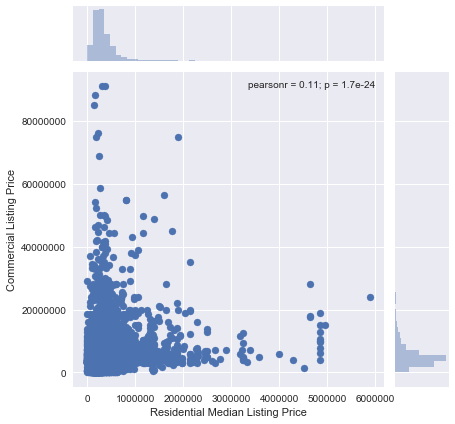

In [224]:
fig = sns.jointplot(df['med_list_price'], df['Price'])
plt.ticklabel_format(style='plain', axis='y')
fig.set_axis_labels('Residential Median Listing Price', 'Commercial Listing Price')

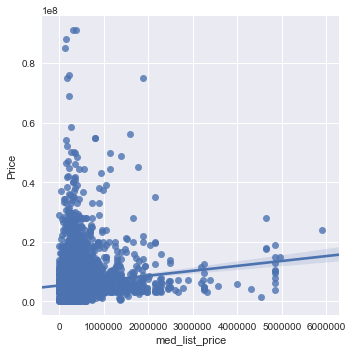

In [134]:
sns.lmplot("med_list_price", "Price", df)

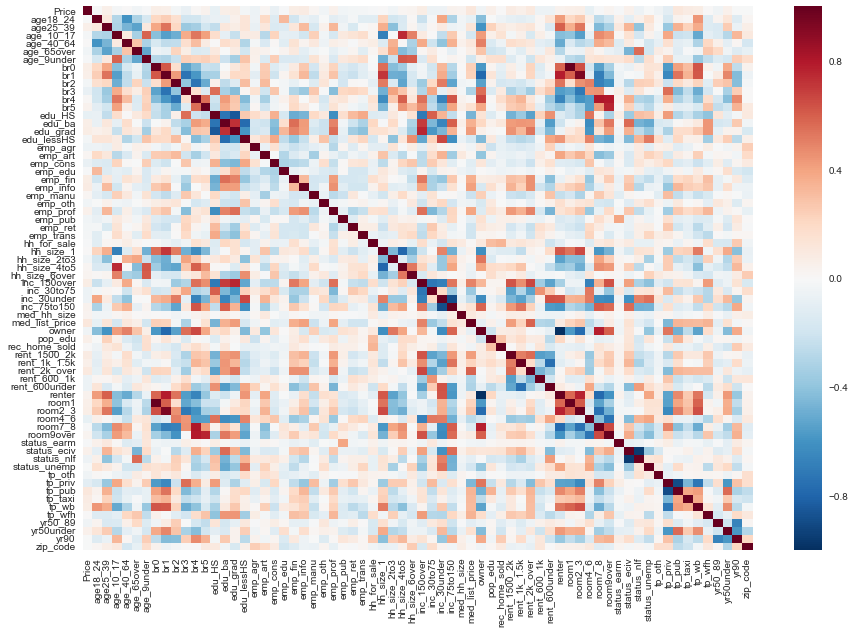

,Price,age18_24,age25_39,age_10_17,age_40_64,age_65over,age_9under,br0,br1,br2,br3,br4,br5,edu_HS,edu_ba,edu_grad,edu_lessHS,emp_agr,emp_art,emp_cons,emp_edu,emp_fin,emp_info,emp_manu,emp_oth,emp_prof,emp_pub,emp_ret,emp_trans,hh_for_sale,hh_size_1,hh_size_2to3,hh_size_4to5,hh_size_6over,inc_150over,inc_30to75,inc_30under,inc_75to150,med_hh_size,med_list_price,owner,pop_edu,rec_home_sold,rent_1500_2k,rent_1k_1.5k,rent_2k_over,rent_600_1k,rent_600under,renter,room1,room2_3,room4_6,room7_8,room9over,status_earm,status_eciv,status_nlf,status_unemp,tp_oth,tp_priv,tp_pub,tp_taxi,tp_wb,tp_wfh,yr50_89,yr50under,yr90,zip_code
Price,1.000000,-0.003935,0.057589,-0.019375,0.001523,-0.032211,-0.014752,0.064475,0.062500,-0.029566,-0.074580,0.009975,0.043438,-0.079779,0.062641,0.072666,-0.029486,-0.057551,0.020816,-0.075127,-0.015134,0.072742,0.084084,0.018115,-0.031737,0.051775,-0.031727,-0.024088,-0.020564,-0.009274,0.001816,-0.038891,0.020243,0.028462,0.076676,-0.061281,-0.050973,0.043938,0.036714,0.111364,-0.046503,0.058763,0.006290,0.078969,0.062082,0.097912,-0.061416,-0.061628,0.046503,0.060052,0.069682,-0.083767,-0.015276,0.025364,-0.014321,0.048307,-0.049499,-0.000562,-0.040464,-0.107844,0.110089,0.079358,0.072241,0.003914,-0.042836,0.053550,-0.005013,-0.005038
age18_24,-0.003935,1.000000,0.105933,-0.289570,-0.594578,-0.317718,-0.166919,0.206400,0.246946,0.162269,-0.198405,-0.193593,-0.103224,-0.073103,-0.077612,0.050476,0.126925,-0.048960,0.199858,-0.127948,0.321543,-0.198106,-0.063060,-0.097598,-0.005377,-0.108731,-0.077063,-0.016391,-0.116969,-0.115687,0.226186,-0.190911,-0.152861,0.014827,-0.221868,-0.023257,0.393735,-0.313800,-0.034379,-0.085515,-0.427938,-0.001904,-0.049766,-0.092821,-0.104539,-0.082735,0.016074,0.125210,0.427937,0.204703,0.260194,0.060549,-0.265727,-0.196155,0.047433,-0.097953,0.055929,0.153716,0.013395,-0.170502,0.040191,0.017206,0.440870,-0.132783,0.036263,0.131184,-0.129518,0.022223
age25_39,0.057589,0.105933,1.000000,-0.308710,-0.463585,-0.532601,0.108126,0.387192,0.541320,0.204864,-0.372356,-0.342780,-0.192393,-0.248307,0.111242,0.072489,0.132331,-0.071587,0.113180,-0.141746,-0.128980,0.118769,0.320127,-0.169782,0.048303,0.331589,-0.040070,-0.161290,-0.007300,0.017583,0.365757,-0.421221,-0.145738,0.027980,-0.086511,0.020712,0.092097,-0.059131,-0.037118,0.125513,-0.599524,0.231540,0.097440,0.069423,0.096565,0.126379,0.015816,-0.150916,0.599523,0.360984,0.536206,0.009215,-0.437639,-0.327390,0.107952,0.336643,-0.403486,0.098671,-0.007693,-0.377889,0.355156,0.230087,0.370936,-0.137993,-0.154947,0.256646,-0.065996,0.066887
age_10_17,-0.019375,-0.289570,-0.308710,1.000000,0.091894,-0.333115,0.591108,-0.415710,-0.548700,-0.490502,0.370849,0.532566,0.412028,0.175933,-0.093434,-0.226639,0.078211,0.082816,-0.280134,0.222947,-0.088800,-0.097338,-0.188885,0.234723,-0.038950,-0.166913,0.099142,0.140375,0.177271,0.028181,-0.679735,-0.006359,0.743984,0.501050,0.087170,0.000325,-0.247522,0.262905,0.017278,-0.176450,0.428656,0.057694,0.145973,-0.026033,0.061042,-0.156509,0.070115,-0.028532,-0.428656,-0.399459,-0.552262,-0.085913,0.473213,0.428163,0.009166,0.155901,-0.180738,0.044592,-0.062003,0.385296,-0.218997,-0.205678,-0.512454,-0.097857,-0.141056,-0.281515,0.330498,0.101050
age_40_64,0.001523,-0.594578,-0.463585,0.091894,1.000000,0.284197,-0.318964,-0.156659,-0.251550,-0.243531,0.170182,0.305898,0.079183,0.003525,0.177030,0.125881,-0.300294,-0.016814,-0.148698,0.009222,-0.117016,0.141876,0.034740,0.102743,-0.048246,0.065420,0.044092,-0.013729,0.050273,0.071757,-0.132906,0.354972,0.007905,-0.318708,0.377438,-0.203187,-0.404267,0.354203,0.053008,0.109426,0.505293,-0.145797,-0.048214,0.179462,0.147380,0.114990,-0.098366,-0.136744,-0.505290,-0.150636,-0.278523,-0.228456,0.368161,0.319822,-0.138247,0.093082,-0.028113,-0.187612,-0.090572,0.162669,-0.107373,-0.078789,-0.308381,0.204038,0.059911,-0.095571,0.022735,-0.175609
age_65over,-0.032211,-0.317718,-0.532601,-0.333115,0.284197,1.000000,-0.518581,-0.058358,-0.079561,0.2

In [153]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
pd.set_option('display.max_columns', 75)
df.corr()

In [229]:
def corrank(X):
        import itertools
        df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['pairs','corr'])    
        print(df.sort_values(by='corr',ascending=False))

corrank(df).head(10) # prints a descending list of correlation pair (Max on top)

                               pairs  corr
489                     (br0, room1)     1
549                   (br1, room2_3)     1
722                   (br4, room7_8)     1
723                 (br4, room9over)     1
547                    (br1, renter)     1
1911                (owner, room7_8)     1
2089               (renter, room2_3)     1
778                 (br5, room9over)     1
918          (edu_grad, inc_150over)     1
226        (age_10_17, hh_size_4to5)     1
847               (edu_ba, edu_grad)     1
529                 (br1, hh_size_1)     1
866            (edu_ba, inc_150over)     1
971        (edu_lessHS, inc_30under)     1
1727     (inc_150over, rent_2k_over)     1
1594            (hh_size_1, room2_3)     1
710                     (br4, owner)     1
2158            (room7_8, room9over)     1
2136                (room2_3, tp_wb)     1
490                   (br0, room2_3)     1
1735        (inc_150over, room9over)     1
1792    (inc_30under, rent_600under)     1
707        

AttributeError: 'NoneType' object has no attribute 'head'

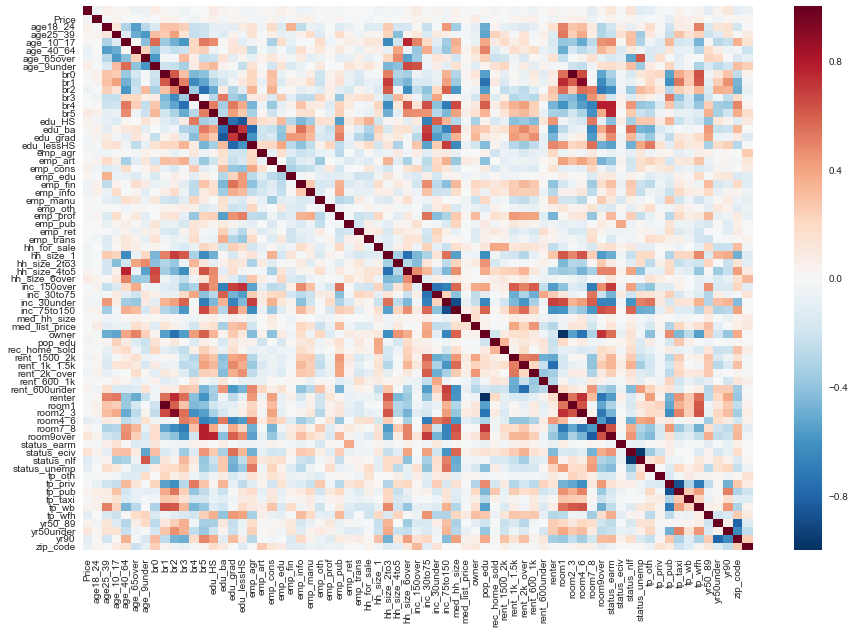

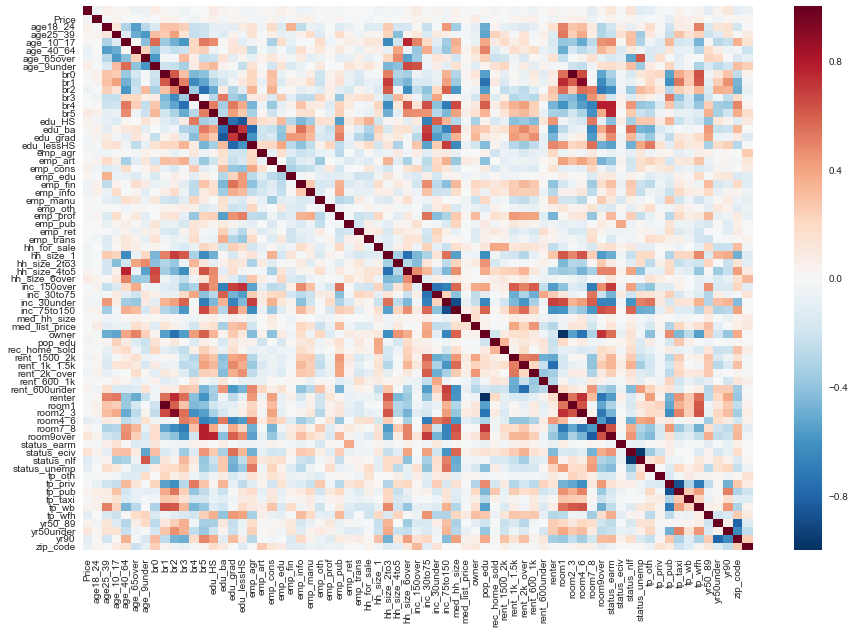

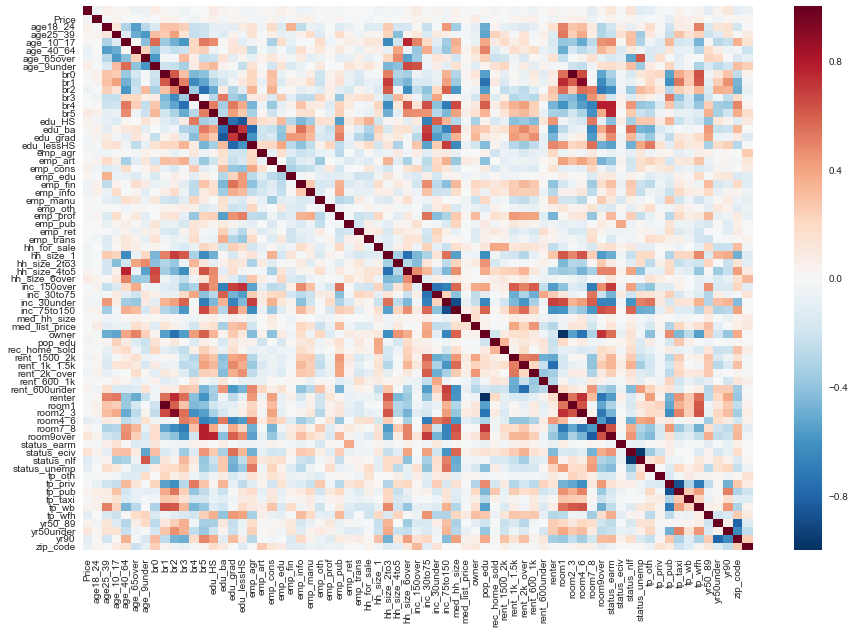

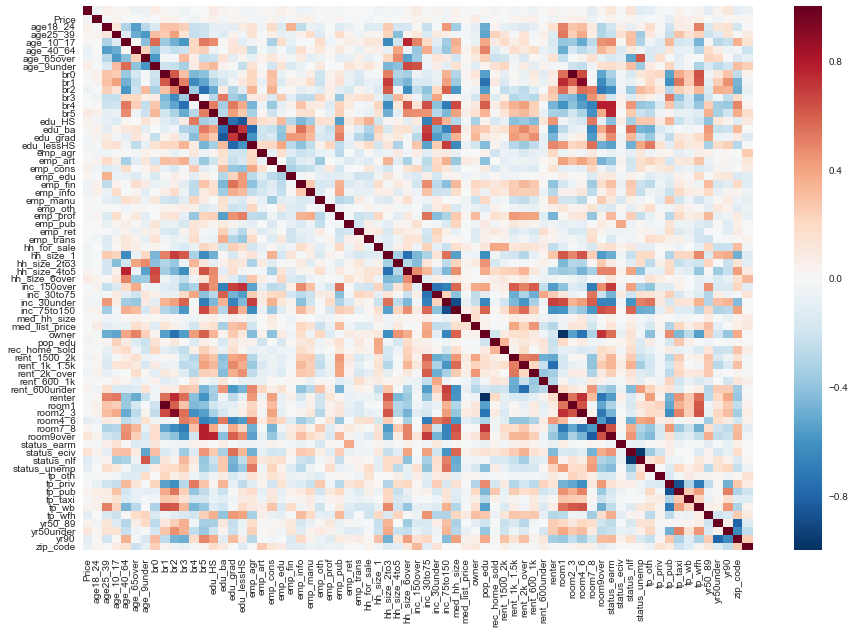

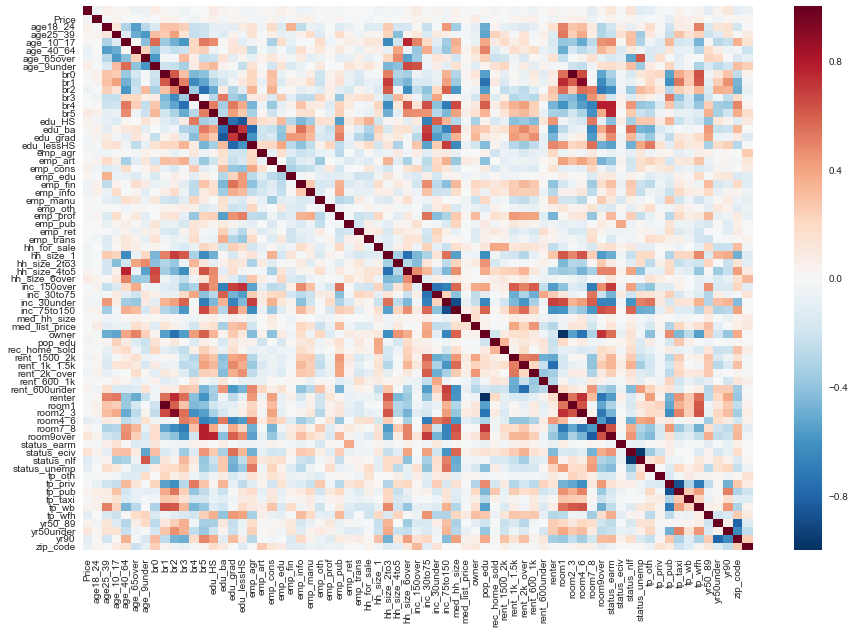

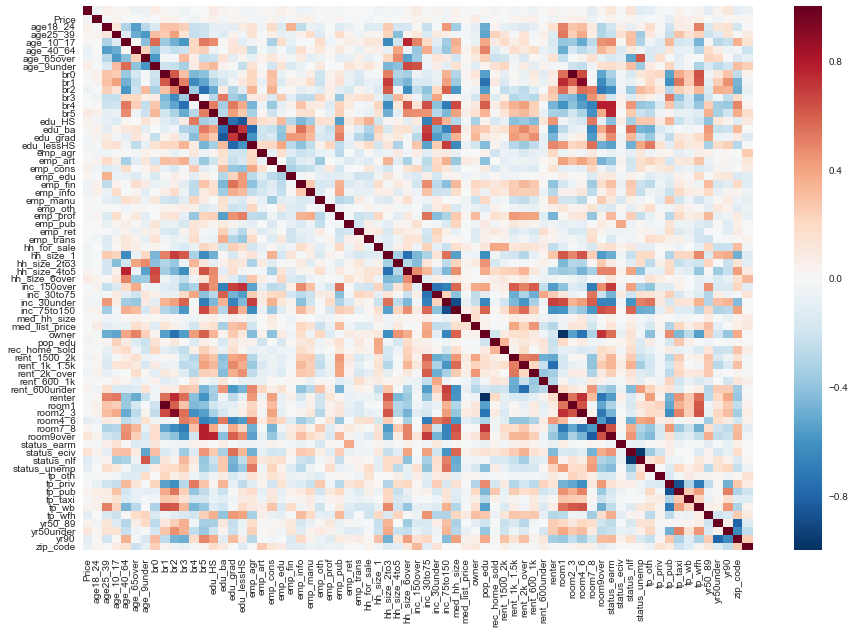

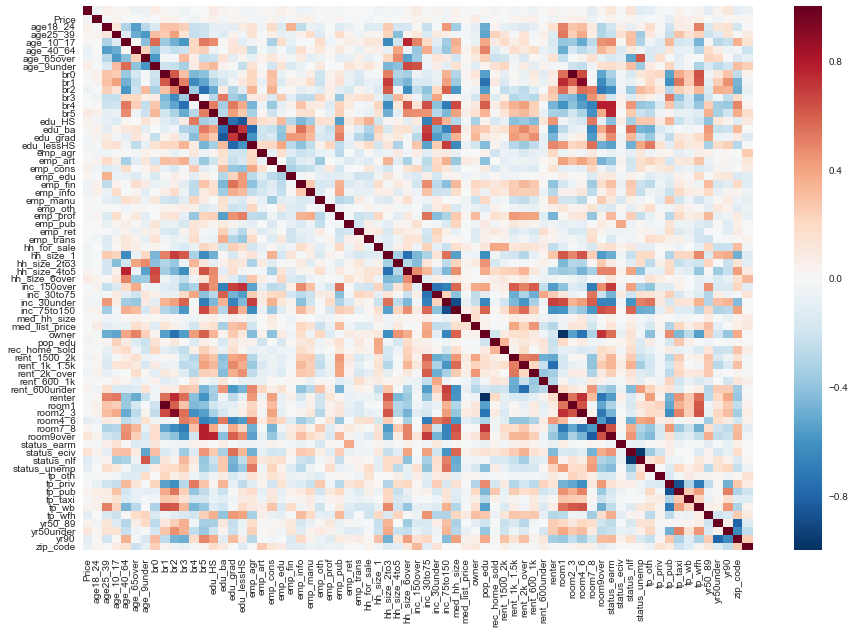

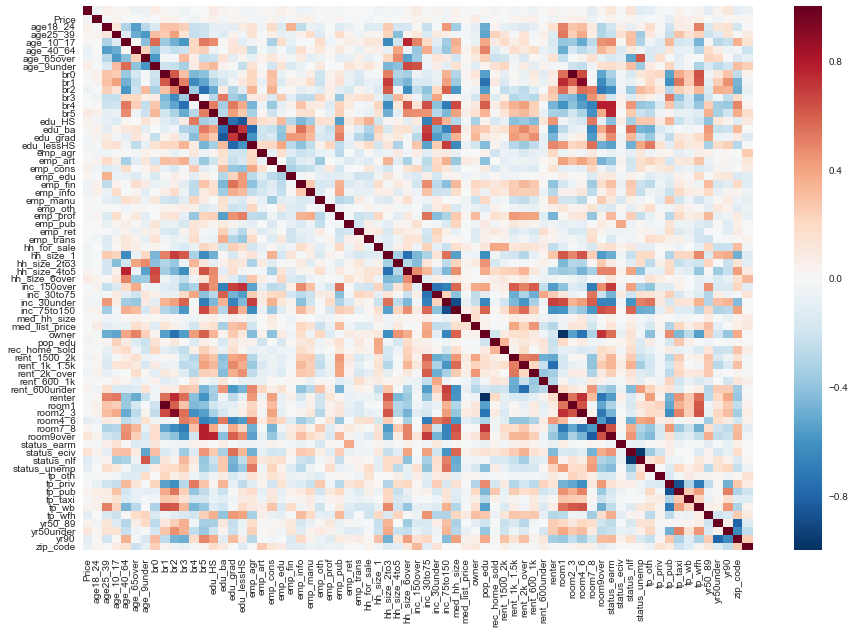

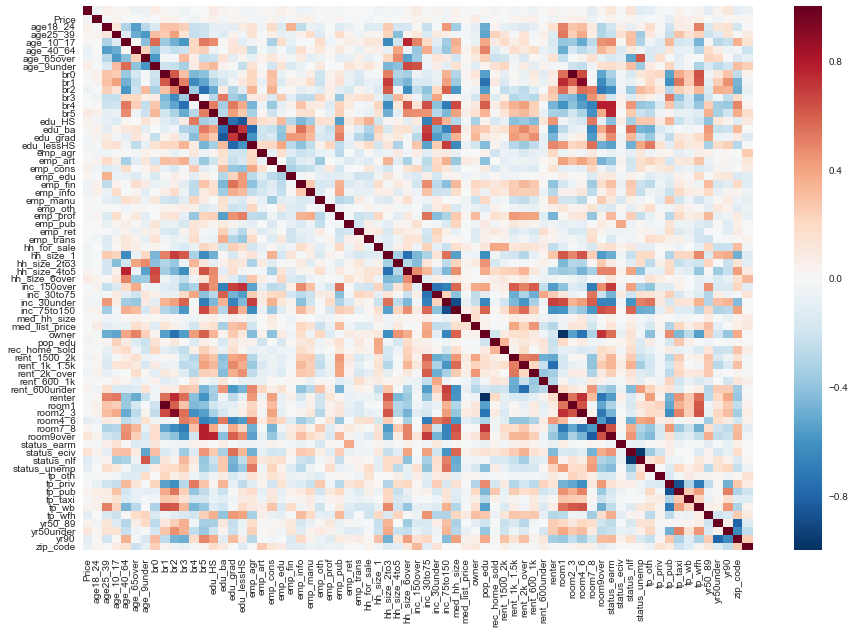

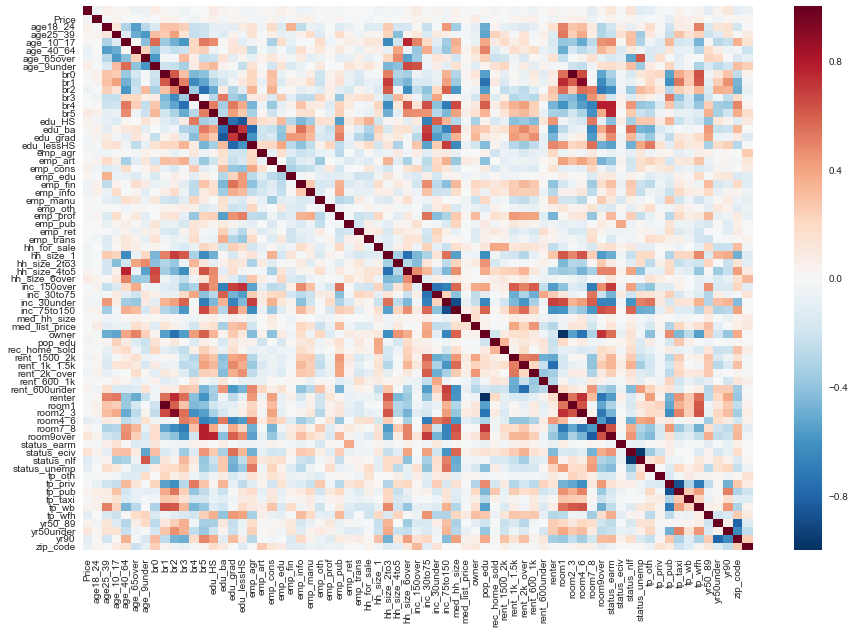

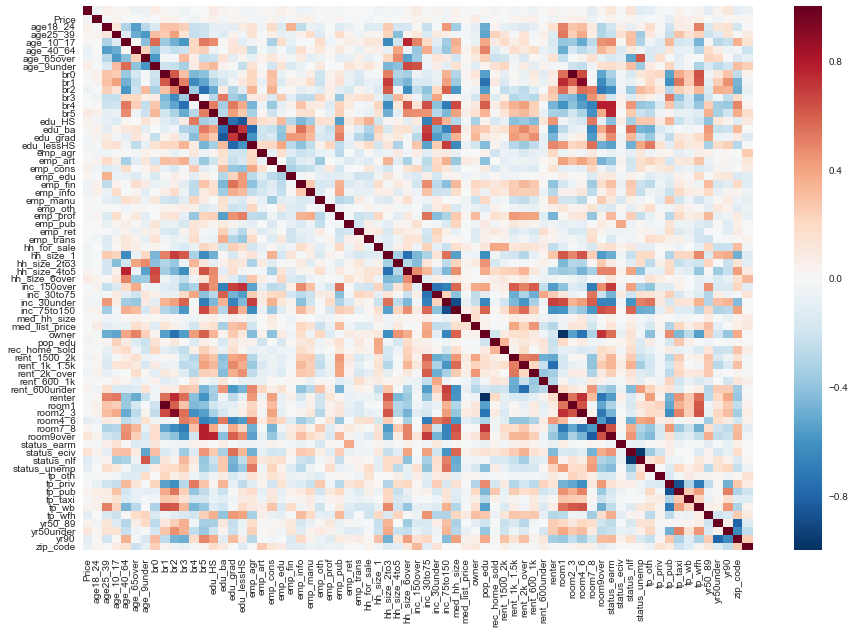

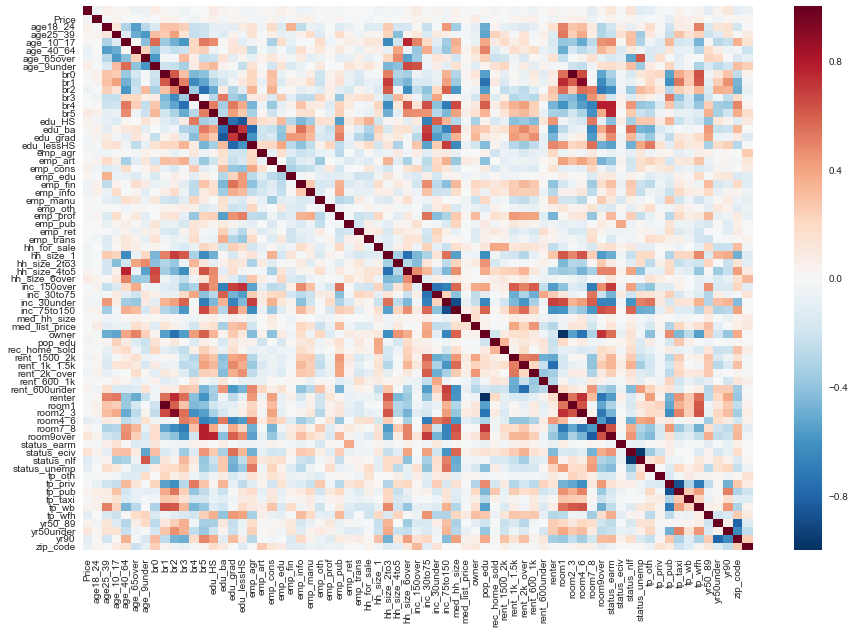

In [174]:
import seaborn as sns
corr = df[df.Type == 'Land'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
corr = df[df.Type == 'Office'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
corr = df[df.Type == 'Retail'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
corr = df[df.Type == 'Special Purpose'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
corr = df[df.Type == 'Hotel & Motel'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

corr = df[df.Type == 'Industrial'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

corr = df[df.Type == 'Multifamily'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

corr = df[df.Type == 'Agricultural'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

corr = df[df.Type == 'Residential Income'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

corr = df[df.Type == 'Senior Housing'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

corr = df[df.Type == 'Sport & Entertainment'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

corr = df[df.Type == 'Health Care'].corr()
sns.heatmap(corr_filt, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [166]:
df['Type'].unique()

array(['Land', 'Office', 'Retail', 'Special Purpose', 'Hotel & Motel',
       'Industrial', 'Multifamily', 'Agricultural', 'Residential Income',
       'Senior Housing', 'Sport & Entertainment', 'Health Care'], dtype=object)

In [183]:
df.shape

(8364, 79)

In [184]:
df.head()

,Address,Price,Type,address,age18_24,age25_39,age_10_17,age_40_64,age_65over,age_9under,br0,br1,br2,br3,br4,br5,broker,broker2,edu_HS,edu_ba,edu_grad,edu_lessHS,emp_agr,emp_art,emp_cons,emp_edu,emp_fin,emp_info,emp_manu,emp_oth,emp_prof,emp_pub,emp_ret,emp_trans,hh_for_sale,hh_size_1,hh_size_2to3,...,inc_75to150,lot_size,med_dolSF,med_hh_size,med_list_price,num_stories,owner,pop_edu,rec_home_sold,rent_1500_2k,rent_1k_1.5k,rent_2k_over,rent_600_1k,rent_600under,renter,room1,room2_3,room4_6,room7_8,room9over,schools,status_earm,status_eciv,status_nlf,status_unemp,tot_area,tp_oth,tp_priv,tp_pub,tp_taxi,tp_wb,tp_wfh,year,yr50_89,yr50under,yr90,zip_code
0,"Anchorage, AK 99518 ·",10239431.0,Land,"Anchorage, AK, 99518",10.7,26.8,9.6,32.7,8.5,11.8,1.3,5.5,38.6,42.8,9.6,2.2,Greg Johnson,NaN,55.4,31.6,7.1,5.9,4.3,10.6,8.5,20.3,6.5,1.9,1.7,2.3,12.1,9.2,11.9,10.8,44.0,30.8,48.9,...,41.2,"680,276 SF",16,1474.0,247500.0,,64.4,6985.0,4.0,22.7,42.4,0.9,30.6,3.3,35.6,0.9,12.3,68.6,13.1,5.0,5,0.4,73.6,20.7,5.3,,2.0,91.9,1.1,0.1,3.3,1.5,,74.8,0.5,24.7,99518
1,"Fairbanks, AK 99701 ·",4050000.0,Office,"Fairbanks, AK, 99701",14.0,26.4,9.5,26.9,9.3,13.9,5.3,20.7,32.6,27.8,11.9,1.8,Pamela Throop,NaN,57.4,24.4,6.8,11.4,1.8,16.1,5.9,22.9,4.1,1.0,0.7,4.0,9.5,8.1,17.8,8.0,19.0,35.8,45.3,...,26.2,3.26 AC,11,1547.0,189900.0,1,42.4,11828.0,0.0,11.9,27.9,3.3,46.5,10.4,57.6,4.8,28.5,50.5,11.7,4.5,23,5.8,57.0,29.8,7.4,"10,000 SF",1.7,87.1,1.8,0.8,6.0,2.7,2006,75.5,9.0,15.5,99701
2,"Anchorage, AK 99502 ·",3500000.0,Office,"Anchorage, AK, 99502",9.1,24.9,9.2,31.3,9.2,16.2,0.2,5.5,31.9,37.7,18.9,5.8,Vern Flowers,NaN,54.0,29.1,11.6,5.3,3.0,7.7,8.0,20.8,5.5,2.6,1.6,4.3,12.8,9.8,13.7,10.1,125.0,21.4,57.9,...,36.7,1.09 AC,17,1750.0,339900.0,,64.4,15494.0,3.0,8.1,63.7,4.4,19.0,4.7,35.6,0.2,9.6,53.6,25.2,11.5,6,0.9,70.7,24.0,4.5,"28,521 SF",3.5,89.7,1.4,0.2,2.5,2.7,,73.9,0.9,25.2,99502
3,"Wasilla, AK 99654 ·",3267000.0,Land,"Wasilla, AK, 99654",9.6,20.9,13.2,32.7,8.0,15.5,3.1,9.3,22.4,43.5,17.0,4.6,"Carl D. Kuhn, CCIM",NaN,63.7,22.5,5.8,8.0,5.8,7.7,13.0,22.5,3.3,2.5,3.1,5.0,7.3,9.3,12.8,7.5,303.0,20.1,51.8,...,36.9,25 AC,15,2031.0,299900.0,,74.4,34750.0,4.0,11.7,33.5,1.4,43.2,10.1,25.6,3.0,15.4,54.9,17.8,8.9,24,0.7,57.3,35.7,6.4,,7.2,85.1,1.2,0.0,1.7,4.8,,43.0,0.7,56.3,99654
4,"Anchorage, AK 99504 ·",5000000.0,Retail,"Anchorage, AK, 99504",11.8,22.5,10.9,31.2,8.7,15.0,0.3,6.3,29.1,45.8,16.3,2.2,Doosan Bak,NaN,55.3,26.8,10.8,7.0,1.7,10.1,6.2,24.5,7.2,1.9,1.7,4.4,11.5,10.6,13.9,6.5,189.0,22.7,54.9,...,37.0,"81,893 SF",15,1492.0,249900.0,1,64.4,26288.0,0.0,18.9,43.3,2.2,25.1,10.5,35.6,0.3,9.6,65.1,18.4,6.6,14,1.9,67.3,25.8,4.9,,1.8,90.2,2.4,0.0,1.2,4.4,1978,75.5,0.4,24.1,99504


In [253]:
pd.DataFrame(df.broker.value_counts())

,broker
Glen Kunofsky,66
Alvin Mansour,32
"Patrick R. Luther, CCIM",22
Doug Passon,21
Leasing and Sales,15
Brad Feller,15
Randy Blankstein,15
Preet Sabharwal,14
Chris Bosworth,14
Mario Baez,13
